3 To - Do Exercise:
For the provided dfset:
• diabetes.csv
Complete the following Problems.
Submission Instructions:
• Submit a single notebook containing:
1. Clean and well-documented code.
2. Outputs and visualizations.
3. Detailed explanations and analysis for all steps.
• Ensure all cells are executed before submission.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/sem3ai/ws4/diabetes.csv')
print("successfully mounted")
print(df.head())
# Check for missing values
missing_values=df.isnull().sum()
print("\n\n\nmissing values:\n\n",missing_values)



Mounted at /content/drive
successfully mounted
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



missing values:

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [ ]:


# Sample dataset (replace this with your actual dataset, df)
# Assume 'df' is your DataFrame, and 'Outcome' is the target column.

# Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values  # Convert features to NumPy array
y = df['Outcome'].values  # Convert target to NumPy array

# Define a function for train-test split from scratch
def train_test_split(X, y, test_size=0.3, random_seed=42):
    """
    Split dataset into training and test set
    arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Check if any rows from X_train appear in X_test (using row-wise comparison)
def check_data_leakage(X_train, X_test):
    """
    Check if any row from X_train appears in X_test (data leakage).
    """
    for row in X_train:
        if np.any(np.all(X_test == row, axis=1)):  # Check if the entire row matches
            return True
    return False

# Check for data leakage
if check_data_leakage(X_train, X_test):
    print("Warning: There is overlap between training and test data (data leakage).")
else:
    print("No overlap between training and test data.")




Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)
No overlap between training and test data.


Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [ ]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
 1   Arguments:
    point1 : np.ndarray
    The first point as a numpy array.
    point2 : np.ndarray
    The second point as a numpy array.
    Returns:
    float
    The Euclidean distance between the two points.
    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
       raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance
# test case for the function
try:
  # define two points
  point1 = np.array([3,4])
  point2 = np.array([0,0])
  # calculate the euclidean distance
  distance = euclidean_distance(point1, point2)
  # check if the result matched the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0
  assert np.isclose(distance, expected_result), f"Expected {expected_result}, but got {distance}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")



def knn_predict_single(query, X_train, y_train, k=3):
   """
   Predict the class label for a single query using the K-nearest neighbors algorithm.
   Arguments:
   query : np.ndarray
   The query point for which the prediction is to be made.
   X_train : np.ndarray
   The training feature matrix.
   y_train : np.ndarray
   The training labels.
   k : int, optional
   The number of nearest neighbors to consider (default is 3).
   Returns:
   int
   The predicted class label for the query.
   """
   distances = [euclidean_distance(query, x) for x in X_train]
   sorted_indices = np.argsort(distances)
   nearest_indices = sorted_indices[:k]
   nearest_labels = y_train[nearest_indices]
   prediction = np.bincount(nearest_labels).argmax()
   return prediction

# test cases for KNN
try:
  # define the query for testing (use one row of the test set, e.g., the first row)
  query = X_test[0] #selecting the first test sample as teh query
  true_label = y_test[0] #orresponding true label for the query

  # predict the label for the single quey using knn_predict_single
  prediction = knn_predict_single(query, X_train, y_train, k=3)

  # print test results
  print("Prediction: ", prediction)
  print("Actual: ", true_label)
  print("Test passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")

def knn_predict_all(X_test, X_train, y_train, k=3):
   """
   Predict the class labels for all test samples using the K-nearest neighbors algorithm.
   Arguments:
   X_test : np.ndarray
   The test feature matrix.
   X_train : np.ndarray
   The training feature matrix.
   y_train : np.ndarray
   The training labels.
   k : int, optional
   the number of nearest neighbors to consider (default is 3).
   Returns:
   np.ndarray
   The predicted class labels for all test samples.
   """
   predictions = [knn_predict_single(query, X_train, y_train, k) for query in X_test]
   return np.array(predictions)

# test cases for KNN
try:
  # predict the labels for the entire test set
  predictions = knn_predict_all(X_test, X_train, y_train, k=3)
  # print test results
  print("Prediction: ", predictions)
  print("Actual: ", y_test)
  # check if predictions match expected format
  assert predictions.shape == y_test.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")


def compute_accuracy(y_true, y_pred):
   """
   Calculate the accuracy of the predictions.
   Arguments:
   y_true : np.ndarray
   The true labels.
   y_pred : np.ndarray
   The predicted labels.
   Returns:
   float
   The accuracy of the predictions.
   """

   correct_predictions = np.sum(y_true == y_pred)
   total_predictions = len(y_true)
   accuracy = (correct_predictions / total_predictions)*100
   return accuracy
#perform prediction on the entire test set
try:
  # make predictions on the entire test set
  predictions = knn_predict_all(X_test, X_train, y_train, k=3)
  # compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occured during prediction or accuracy computation: {e}")


Test passed successfully!
Prediction:  0
Actual:  0
Test passed successfully!
Prediction:  [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Actual:  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 

Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [ ]:
#scale the feature matrix x
def scale_features(x_train, x_test):
  """
  scale features using Z-score normalization
  Arguments:
  x_train: np.ndarray; training data features
  x_test: np.ndarray; testing data features
  Returns:
  x_train_scaled: np.ndarray; scaled training data
  x_test_scaled: np.ndarray; scaled testing data
  """

  mean = np.mean(x_train, axis=0)
  std = np.std(x_train, axis=0)
  x_train_scaled = (x_train - mean) / std
  x_test_scaled = (x_test - mean) / std
  return x_train_scaled, x_test_scaled



#use the scaled data for training and testing the kNN classifier

# scale the feature matrix
x_train_scaled, x_test_scaled = scale_features(X_train, X_test)

# perform predictions on scaled data
predictions_scaled = knn_predict_all(x_test_scaled, x_train_scaled, y_train, k=3)

# evaluate accuracy on scaled data
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

# print results
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}%")

Accuracy on scaled data: 70.87%


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Running KNN on original dataset...
Scaling the dataset...
Running KNN on scaled dataset...


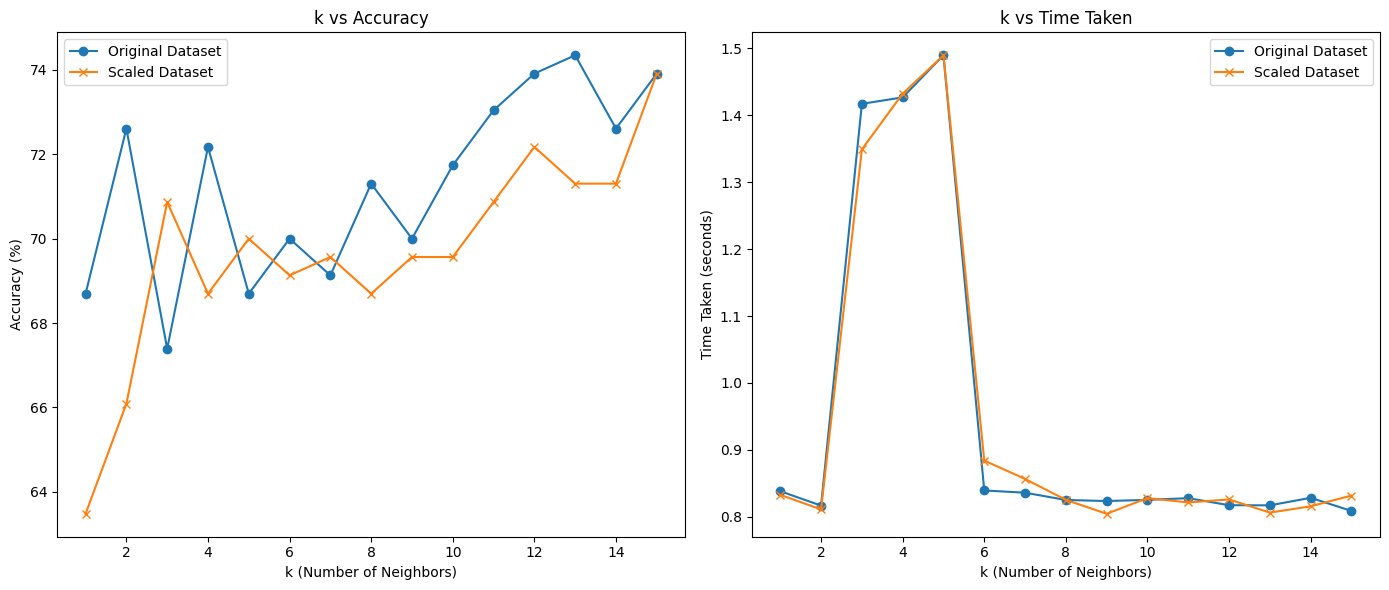

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have these functions defined:
# - knn_predict_all
# - accuracy
# - scale_features (to scale the data)

import time
import numpy as np
import matplotlib.pyplot as plt

# Assuming the necessary functions are already defined:
# - knn_predict_all (for making predictions with KNN)
# - compute_accuracy (for calculating the accuracy)
# - scale_features (for scaling the data)

# Define range of k values (1 to 15)
k_range = range(1, 16)

# 1. Original Dataset Experiment

print("Running KNN on original dataset...")

# Initialize lists to store accuracies and times
accuracies_original = []
times_original = []

# Loop over all k values
for k in k_range:
    # Measure the time taken for prediction
    start_time = time.time()

    # Predict on the test set using kNN
    predictions = knn_predict_all(X_test, X_train, y_train, k=k)

    # Compute accuracy
    acc = compute_accuracy(y_test, predictions)

    # Measure the time taken for prediction
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Append accuracy and time to their respective lists
    accuracies_original.append(acc)
    times_original.append(elapsed_time)

    # Print progress
   # print(f"k = {k}, Accuracy = {acc:.2f}%, Time Taken = {elapsed_time:.4f} seconds")

# 2. Scaled Dataset Experiment

print("Scaling the dataset...")
# Scale the feature data
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

print("Running KNN on scaled dataset...")

# Initialize lists to store accuracies and times
accuracies_scaled = []
times_scaled = []

# Loop over all k values for the scaled dataset
for k in k_range:
    # Measure the time taken for prediction
    start_time = time.time()

    # Predict on the test set using kNN
    predictions = knn_predict_all(X_test_scaled, X_train_scaled, y_train, k=k)

    # Compute accuracy
    acc = compute_accuracy(y_test, predictions)

    # Measure the time taken for prediction
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Append accuracy and time to their respective lists
    accuracies_scaled.append(acc)
    times_scaled.append(elapsed_time)

    # Print progress
   # print(f"k = {k}, Accuracy = {acc:.2f}%, Time Taken = {elapsed_time:.4f} seconds")




# Plot the results

# Plot k vs Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, accuracies_original, label='Original Dataset', marker='o')
plt.plot(k_range, accuracies_scaled, label='Scaled Dataset', marker='x')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.legend()

# Plot k vs Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_range, times_original, label='Original Dataset', marker='o')
plt.plot(k_range, times_scaled, label='Scaled Dataset', marker='x')
plt.title("k vs Time Taken")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.legend()

plt.tight_layout()
plt.show()


small k consideration:the number of neighbors to be considered is smaller, which makes prediction faster because fewer distances need to be computed.
the small k value might not be very effective at capturing the underlying structure of the data, which could lead to inaccurate predictions
When 1
k=1, the model computes the distance to all training points for each test point but only selects the closest one. This is computationally cheaper than larger k, but the overall accuracy might be lower.
large k consideration: the number of neighbors to consider grows, and the model needs to compute more distances for each test point, increasing the overall computational cost. For larger datasets or higher values of
k, this can lead to slower predictions.
 If k=15, the model has to compute distances for 15 nearest neighbors instead of just 1. The time taken for predictions increases, and with larger datasets, this increase in time can become substantial

middle ground between small and large
𝑘
k, which provides a good balance between bias and variance. You can identify this by testing multiple values of
𝑘
k and choosing the one with the best cross-validation accuracy.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

knn needs to compute the distance of all set of datas for every data point in training set, i.e. it would be time consuming for big datas,
it has a quite slow data prediction time, we can face input/output bottleneck problems since, data might not fit in memory which can slow down calculations.


as for high dimensional datasets;
computational time would increase drastically, as it is already a slow model, so, as features increase time to compute distance will increase as well.
overfitting:knn overfits in these datas as they may lead to situation where nearest neighbors are very similar to each other but do not generalize with unseen data.




improve it:
Approximate Nearest Neighbor Search: Instead of computing the exact distance to every data point, approximate methods find the closest points quickly but not necessarily exactly. This is much faster, and in most cases, the results are good enough(use local sensitive hashing).
reduce dimensionality: